<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/My Drive/Data/cats_and_dogs_filtered.zip" -d "/content"

Archive:  /content/drive/My Drive/Data/cats_and_dogs_filtered.zip
   creating: /content/cats_and_dogs_filtered/train/
   creating: /content/cats_and_dogs_filtered/train/cats/
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.0.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.1.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.10.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.100.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.101.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.102.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.103.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.104.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.105.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.106.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.107.jpg  
  inflating: /content/cats_and_dogs_filtered/train/cats/cat.

In [4]:
base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print(total_train)
print(total_val)

2000
1000


In [7]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

## **Model Building**

In [8]:
# Initialising the CNN
classifier = Sequential()

In [9]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

In [10]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(2, 2))

In [11]:
# Step 1 & 2 with more hidden layers
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

In [12]:
# Step 3 - Dropout
classifier.add(Dropout(0.5))

In [13]:
# Step 4 - Flattening
classifier.add(Flatten())

In [14]:
# Step 5 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

In [15]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## **Data Augmentation and Preparation**

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [18]:
training_set = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
validation_set = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
epochs=200
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
20/20 [==============================] - 50s 819ms/step - loss: 0.7166 - accuracy: 0.5014 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/200
20/20 [==============================] - 16s 814ms/step - loss: 0.6923 - accuracy: 0.5344 - val_loss: 0.6878 - val_accuracy: 0.6170
Epoch 3/200
20/20 [==============================] - 16s 819ms/step - loss: 0.6887 - accuracy: 0.5490 - val_loss: 0.6592 - val_accuracy: 0.5930
Epoch 4/200
20/20 [==============================] - 16s 823ms/step - loss: 0.6782 - accuracy: 0.5802 - val_loss: 0.6394 - val_accuracy: 0.6080
Epoch 5/200
20/20 [==============================] - 16s 827ms/step - loss: 0.6556 - accuracy: 0.5797 - val_loss: 0.6439 - val_accuracy: 0.6050
Epoch 6/200
20/20 [==============================] - 16s 820ms/step - loss: 0.6495 - accuracy: 0.6162 - val_loss: 0.6387 - val_accuracy: 0.6340
Epoch 7/200
20/20 [==============================] - 16s 820ms/step - loss: 0.6493 - accuracy: 0.6035 - val_loss: 0.6141 - val_accuracy:

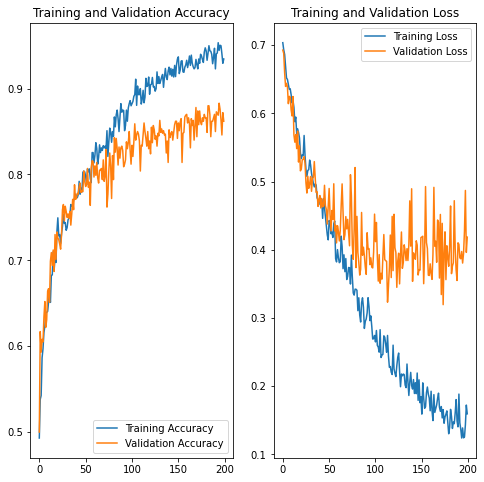

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()